# Data Analysis and Data Science Task 2

This notebook contains full solutions for:
- **Project 1: General EDA** using `Global_Superstore.csv`
- **Project 2: Sales Performance Analysis** using `sales_data.csv`

## Project 1: General Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
superstore = pd.read_csv("Global_Superstore.csv")
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


### Data Cleaning - Global Superstore

In [20]:
# Handle missing values
superstore = superstore.dropna()

# Remove duplicates
superstore = superstore.drop_duplicates()

# Convert columns to appropriate types if needed
superstore['Sales'] = pd.to_numeric(superstore['Sales'], errors='coerce')
superstore['Profit'] = pd.to_numeric(superstore['Profit'], errors='coerce')

# Handle outliers using IQR method
Q1 = superstore[['Sales', 'Profit']].quantile(0.25)
Q3 = superstore[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1
superstore = superstore[~((superstore[['Sales', 'Profit']] < (Q1 - 1.5 * IQR)) | (superstore[['Sales', 'Profit']] > (Q3 + 1.5 * IQR))).any(axis=1)]

superstore.reset_index(drop=True, inplace=True)
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,33412,CA-2012-164882,31-10-2012,31-10-2012,Same Day,SG-20080,Sandra Glassco,Consumer,Redlands,California,...,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,425.833,1,0.15,20.0392,150.07,Critical
1,34584,CA-2012-157770,13-12-2012,15-12-2012,First Class,RD-19585,Rob Dowd,Consumer,Temecula,California,...,TEC-PH-10001530,Technology,Phones,Plantronics Voyager Pro Legend,494.376,3,0.20,49.4376,141.27,Critical
2,35208,CA-2014-126788,06-06-2014,07-06-2014,First Class,AB-10105,Adrian Barton,Consumer,Pearland,Texas,...,TEC-PH-10001619,Technology,Phones,LG G3,470.376,3,0.20,52.9173,137.41,High
3,38829,CA-2013-107146,18-06-2013,20-06-2013,First Class,LC-16885,Lena Creighton,Consumer,Longmont,Colorado,...,FUR-CH-10004853,Furniture,Chairs,"Global Manager's Adjustable Task Chair, Storm",483.136,4,0.20,54.3528,136.72,High
4,39899,US-2011-133949,31-12-2011,31-12-2011,Same Day,JL-15175,James Lanier,Home Office,Reno,Nevada,...,TEC-PH-10004908,Technology,Phones,Panasonic KX TS3282W Corded phone,475.944,7,0.20,59.4930,128.31,Medium


### Statistical Summary

In [21]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000,7874.000000
mean,36295.412624,55724.935357,70.727025,3.509779,0.148048,11.170064,7.698621
std,2889.685182,32109.245924,90.106961,2.059256,0.199800,17.904384,12.498076
min,31297.000000,1040.000000,0.444000,1.000000,0.000000,-39.637000,0.010000
25%,33790.750000,23464.000000,13.459000,2.000000,0.000000,2.098275,1.140000
50%,36290.500000,60076.000000,33.568000,3.000000,0.200000,7.158900,3.070000
75%,38794.750000,90008.000000,90.000000,5.000000,0.200000,18.187200,8.727500
max,41289.000000,99301.000000,496.860000,14.000000,0.800000,70.722000,150.070000


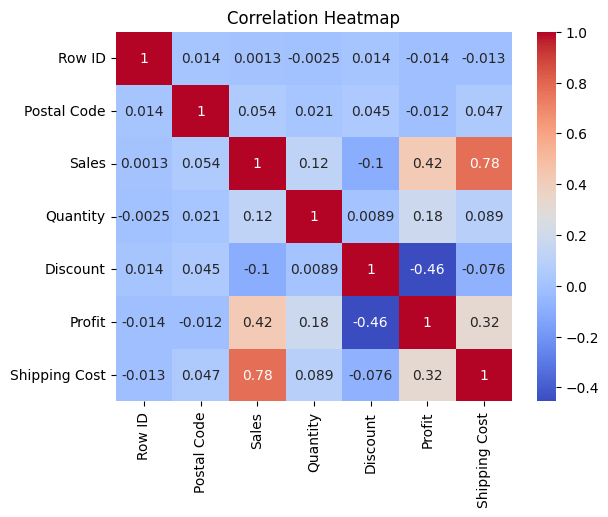

In [22]:
sns.heatmap(superstore.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


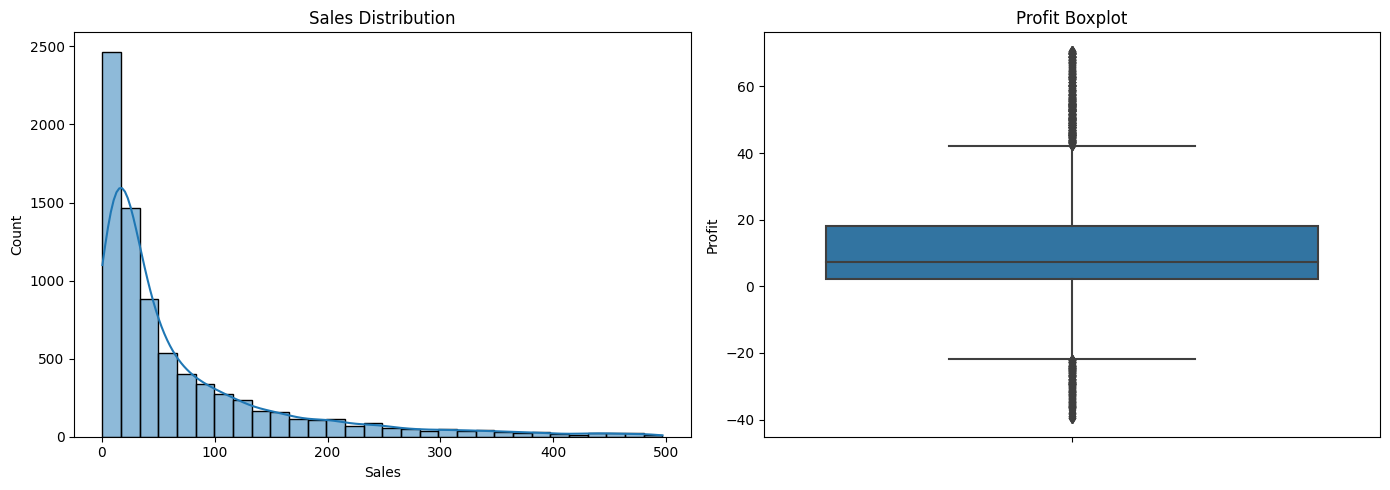

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(superstore['Sales'], bins=30, kde=True, ax=axes[0]).set_title("Sales Distribution")
sns.boxplot(y=superstore['Profit'], ax=axes[1]).set_title("Profit Boxplot")
plt.tight_layout()
plt.show()

## Project 2: Sales Performance Analysis

In [24]:
sales = pd.read_csv("sales_data.csv")

# Parse date column
sales['Date'] = pd.to_datetime(sales['Date'])

# Remove duplicates and handle missing values
sales.drop_duplicates(inplace=True)
sales.fillna(sales.mean(numeric_only=True), inplace=True)
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


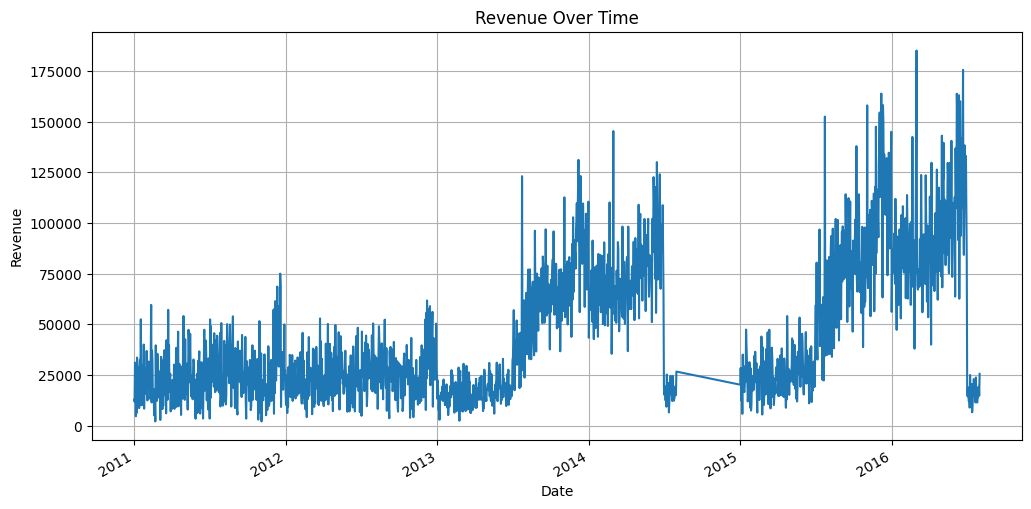

In [25]:
sales.groupby('Date')['Revenue'].sum().plot(figsize=(12,6), title="Revenue Over Time")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ayush Chintalwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498:

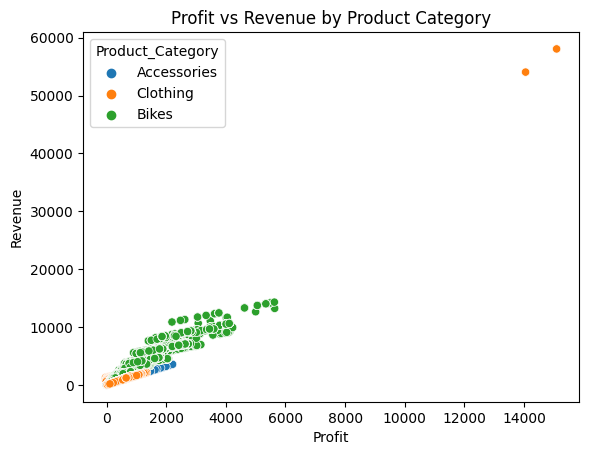

In [27]:
sns.scatterplot(data=sales, x='Profit', y='Revenue', hue='Product_Category')
plt.title("Profit vs Revenue by Product Category")
plt.show()

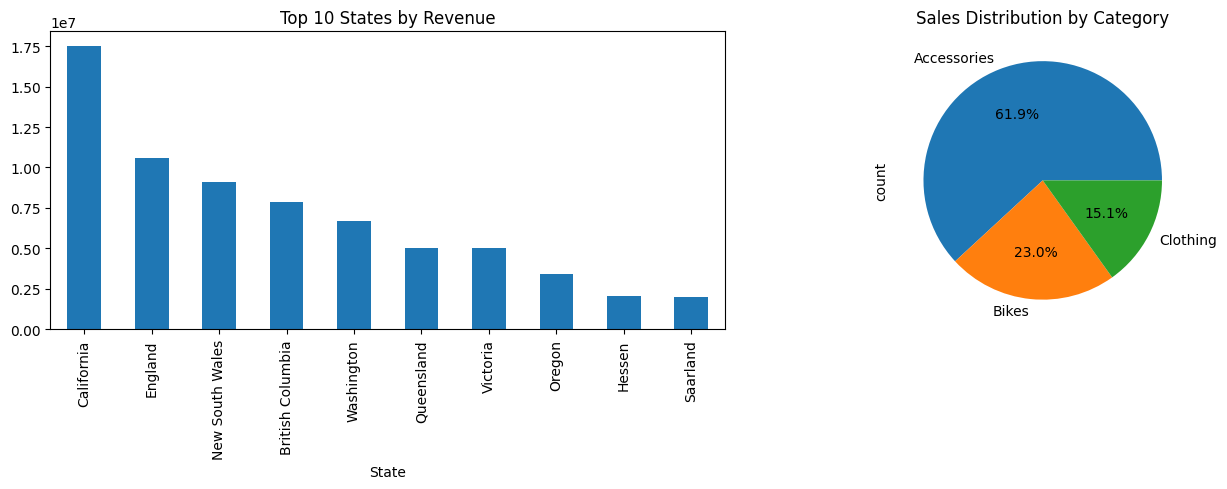

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sales.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0], title="Top 10 States by Revenue")
sales['Product_Category'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title="Sales Distribution by Category")
plt.tight_layout()
plt.show()

### Predictive Modeling - Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = sales[['Profit']] 
y = sales['Revenue'] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.9123125945860863
Mean Squared Error: 151425.6377905236


## Final Insights & Recommendations

- **Global Superstore** shows distinct sales and profit patterns across categories and regions.
- **Sales Data** highlights how discounts and profits influence revenue.
- A linear regression model was trained to predict revenue, offering valuable business decision insights.